<h1>Descrição e Limpeza da base de dados</h1>

- **Exploração Inicial:** Análise exploratória de dados (EDA) para entender a distribuição e as características das variáveis.
- **Visualização:** Visualização gráfica, histogramas, e mapas de calor para visualizar a distribuição espacial e temporal dos dados.
- **Tratamento de Dados Ausentes:** Aplicação de técnicas para lidar com valores ausentes, como interpolação ou imputação.
- **Normalização e Padronização:** Normalize os dados para ajustar escalas diferentes entre as variáveis.

In [3]:
import os
import pandas as pd

In [4]:
# Caminho da pasta onde estão os arquivos CSV
caminho_pasta = 'dados'

# Lista todos os arquivos na pasta
arquivos_csv = [f for f in os.listdir(caminho_pasta) if f.endswith('.csv')]


In [5]:
# Lista para armazenar DataFrames
dataframes = []

In [6]:
# Lê cada arquivo CSV e armazena no DataFrame
for arquivo in arquivos_csv:
    caminho_arquivo = os.path.join(caminho_pasta, arquivo)
    df = pd.read_csv(caminho_arquivo)
    dataframes.append(df)

# Concatena todos os DataFrames em um único DataFrame
base_dados = pd.concat(dataframes, ignore_index=True)

### Base de 2014 -2024 concatenada 

In [7]:
# Exibe as primeiras linhas do DataFrame concatenado
base_dados.head()

,DataHora,Satelite,Pais,Estado,Municipio,Bioma,DiaSemChuva,Precipitacao,RiscoFogo,Latitude,Longitude,FRP
0,2013/10/14 21:07:39,TRMM,Brasil,MINAS GERAIS,CRISTÁLIA,Cerrado,NaN,NaN,NaN,-16.80000,-42.85000,NaN
1,2013/04/20 04:01:00,NPP-375D,Brasil,BAHIA,JUAZEIRO,Caatinga,NaN,NaN,NaN,-9.59032,-40.61832,NaN
2,2013/04/20 04:04:00,NPP-375D,Brasil,SÃO PAULO,TAQUARITINGA,Cerrado,NaN,NaN,NaN,-21.40294,-48.70252,NaN
3,2013/04/20 04:04:00,NPP-375D,Brasil,SÃO PAULO,POPULINA,Mata Atlântica,NaN,NaN,NaN,-19.97643,-50.50870,NaN
4,2013/04/20 04:04:00,NPP-375D,Brasil,SÃO PAULO,TAQUARITINGA,Cerrado,NaN,NaN,NaN,-21.40306,-48.71038,NaN


In [8]:
print("Número de linhas duplicadas antes da limpeza:", base_dados.duplicated(subset=['DataHora', 'Satelite', 'Pais', 'Estado', 'Municipio', 'Bioma', 'DiaSemChuva', 'Precipitacao', 'RiscoFogo', 'Latitude', 'Longitude']).sum())


Número de linhas duplicadas antes da limpeza: 2048


In [9]:
# Remover duplicatas
base_dados = base_dados.drop_duplicates(subset=['DataHora', 'Satelite', 'Pais', 'Estado', 'Municipio', 'Bioma', 'DiaSemChuva', 'Precipitacao', 'RiscoFogo', 'Latitude', 'Longitude'])

# Visualizar o número de duplicatas após a limpeza
print("Número de linhas duplicadas após a limpeza:", base_dados.duplicated(subset=['DataHora', 'Satelite', 'Pais', 'Estado', 'Municipio', 'Bioma', 'DiaSemChuva', 'Precipitacao', 'RiscoFogo', 'Latitude', 'Longitude']).sum())


Número de linhas duplicadas após a limpeza: 0


In [10]:
#Verifica se ainda há linhas duplicadas
#duplicated_rows = base_dados[base_dados.duplicated(subset=['DataHora', 'Satelite', 'Pais', 'Estado', 'Municipio', 'Bioma', 'DiaSemChuva', 'Precipitacao', 'RiscoFogo', 'Latitude', 'Longitude'], keep=False)]
duplicated_rows = base_dados[base_dados.duplicated()]
# Exibir as linhas duplicadas
duplicated_rows

,DataHora,Satelite,Pais,Estado,Municipio,Bioma,DiaSemChuva,Precipitacao,RiscoFogo,Latitude,Longitude,FRP


### Data Exploratory Analisys - Inicial

In [11]:
# Verifique se a coluna 'DataHora' está no formato datetime
base_dados['DataHora'] = pd.to_datetime(base_dados['DataHora'])

# Ordenar o DataFrame pela coluna 'DataHora'
base_dados = base_dados.sort_values(by='DataHora')

# Resetar os índices do DataFrame
base_dados = base_dados.reset_index(drop=True)



In [12]:
# Verificar as primeiras linhas do DataFrame ordenado e com índices ajustados
base_dados.head

<bound method NDFrame.head of                     DataHora   Satelite    Pais             Estado  \
0        2013-01-01 01:00:00    GOES-12  Brasil  RIO GRANDE DO SUL   
1        2013-01-01 01:00:00    GOES-13  Brasil       MINAS GERAIS   
2        2013-01-01 01:00:00    GOES-12  Brasil  RIO GRANDE DO SUL   
3        2013-01-01 01:00:00    GOES-12  Brasil  RIO GRANDE DO SUL   
4        2013-01-01 01:07:00  TERRA_M-M  Brasil       MINAS GERAIS   
...                      ...        ...     ...                ...   
36850746 2024-08-01 23:56:00  TERRA_M-T  Brasil              PIAUÍ   
36850747 2024-08-01 23:56:00  TERRA_M-T  Brasil              PIAUÍ   
36850748 2024-08-01 23:56:00  TERRA_M-T  Brasil              PIAUÍ   
36850749 2024-08-01 23:56:00  TERRA_M-T  Brasil            PARAÍBA   
36850750 2024-08-01 23:56:00  TERRA_M-T  Brasil              PIAUÍ   

           Municipio           Bioma  DiaSemChuva  Precipitacao  RiscoFogo  \
0          JAQUIRANA  Mata Atlântica          NaN  

**Distribuição das Variaveis Numéricas**

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

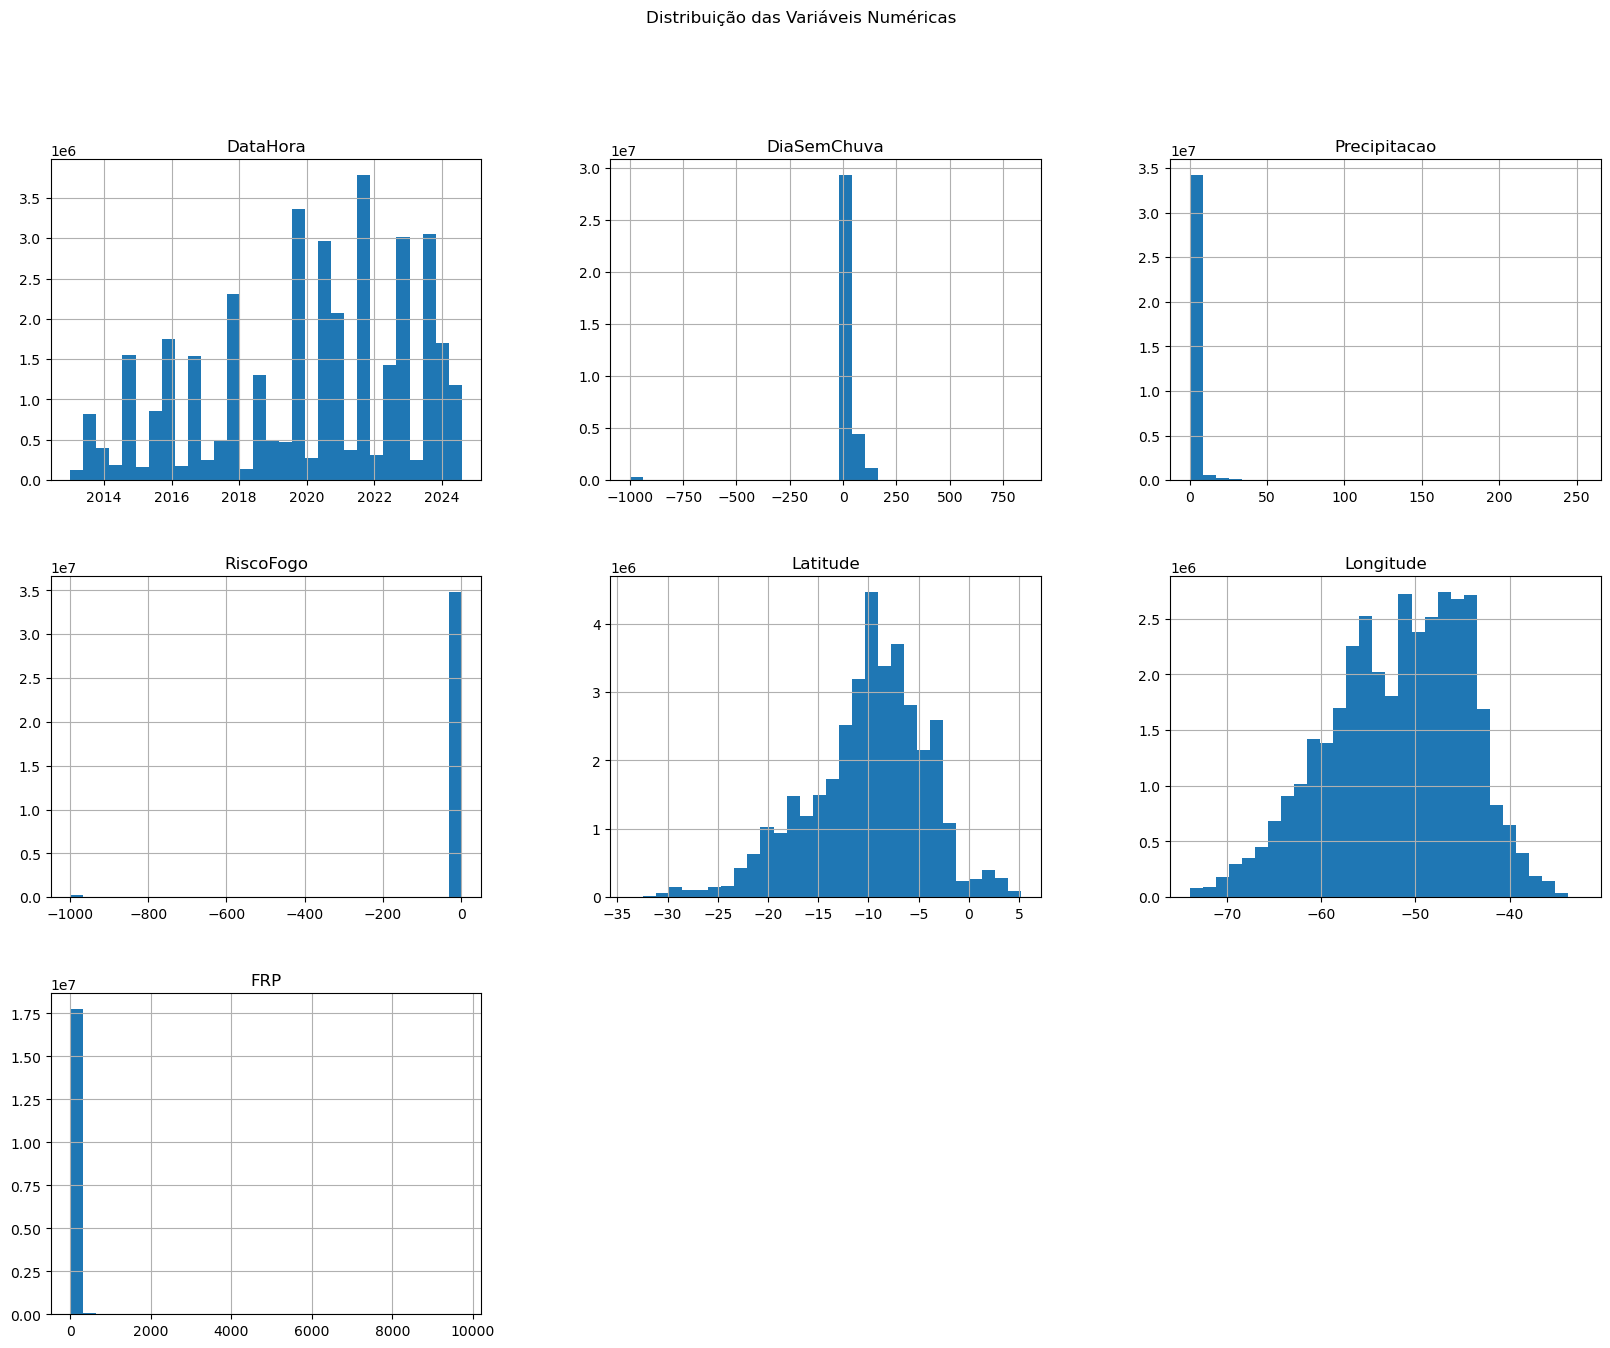

In [14]:
# Histograma para variáveis numéricas
base_dados.hist(bins=30, figsize=(20, 15), layout=(3, 3))
plt.suptitle('Distribuição das Variáveis Numéricas')
plt.show()


**Análise Temporal**

c:\Users\gustavo.j.siebel\AppData\Local\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


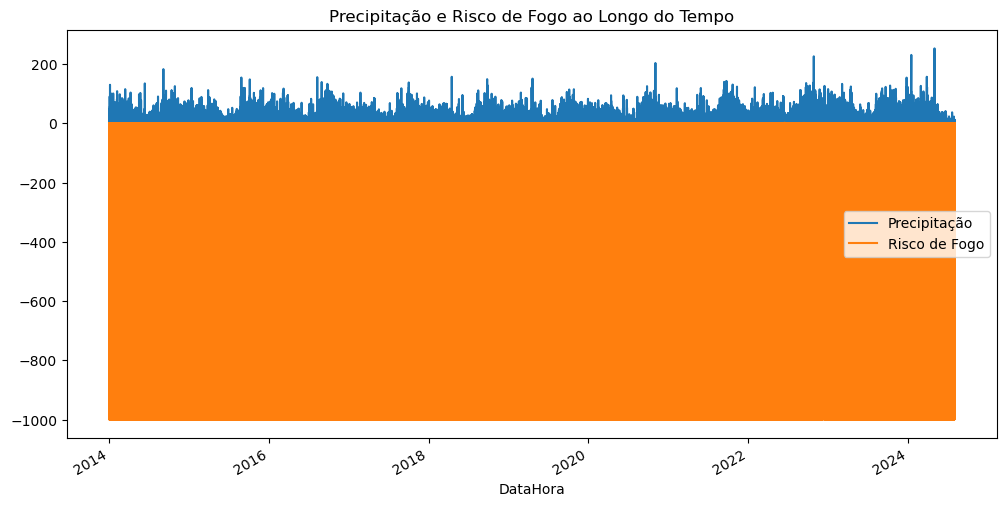

In [15]:
# Análise temporal da precipitação e risco de fogo
plt.figure(figsize=(12, 6))
base_dados.set_index('DataHora')['Precipitacao'].plot(label='Precipitação')
base_dados.set_index('DataHora')['RiscoFogo'].plot(label='Risco de Fogo')
plt.legend()
plt.title('Precipitação e Risco de Fogo ao Longo do Tempo')
plt.show()

**Análise dos Biomas**

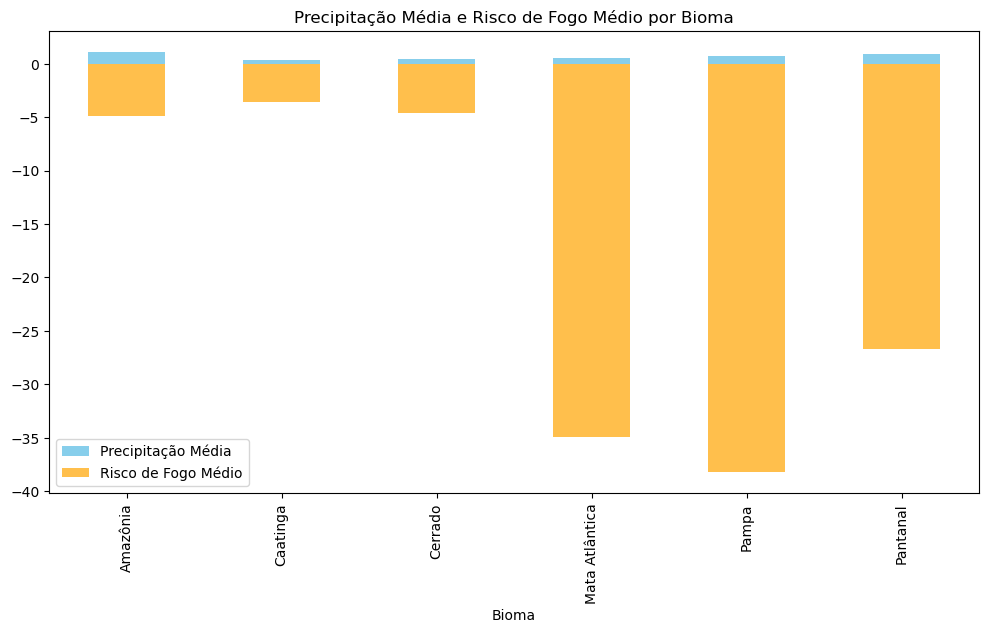

In [16]:
# Precipitação média por bioma
biome_precipitation = base_dados.groupby('Bioma')['Precipitacao'].mean()
biome_fire_risk = base_dados.groupby('Bioma')['RiscoFogo'].mean()

plt.figure(figsize=(12, 6))
biome_precipitation.plot(kind='bar', label='Precipitação Média', color='skyblue')
biome_fire_risk.plot(kind='bar', label='Risco de Fogo Médio', color='orange', alpha=0.7)
plt.legend()
plt.title('Precipitação Média e Risco de Fogo Médio por Bioma')
plt.show()


In [22]:
base_dados.to_csv('dados_limpos.csv', index=False)


### Ajuste **RiscoFogo**


A base de dados contém valores de RiscoFogo ausente ou com erro de computação. Estes valores estão representados como -999

A imputação por KNN (K-Nearest Neighbors) usa os valores dos vizinhos mais próximos para imputar os dados ausentes.

#### KNN - [não utilizado]

In [3]:
import numpy as np
from sklearn.impute import KNNImputer
import pandas as pd

In [4]:
base_dados = pd.read_csv('dados_limpos.csv')

In [5]:
# Remover a coluna 'FRP'
base_dados = base_dados.drop(columns=['FRP'])

# Remover as linhas com dados nulos nas colunas 'DiaSemChuva', 'Precipitacao', 'RiscoFogo'
base_dados = base_dados.dropna(subset=['DiaSemChuva', 'Precipitacao', 'RiscoFogo'])

# Converter a coluna 'DataHora' para o formato datetime
base_dados['DataHora'] = pd.to_datetime(base_dados['DataHora'])

In [6]:
#Verificação da qtd de valores errados.
# Filtrar os dados para manter apenas os valores de RiscoFogo entre 0 e 1
filtered_base_dados = base_dados[(base_dados['RiscoFogo'] >= 0)]
valores_com_risco_fogo_negativo = len(base_dados) - len(filtered_base_dados)
porcentagem_valores_negativos = (valores_com_risco_fogo_negativo / len(base_dados)) * 100

# Exibir algumas informações sobre os dados filtrados
print(f"Número de linhas do dataFrame com Risco Fogo < 0 : {len(base_dados)}")
print(f"Número de linhas após remover outliers valores < 0: {len(filtered_base_dados)}")
print(f"Qt. valores com Risco Fogo < 0: {valores_com_risco_fogo_negativo} ({porcentagem_valores_negativos:.2f}% dos valores totais)")


Número de linhas do dataFrame com Risco Fogo < 0 : 35152677
Número de linhas após remover outliers valores < 0: 34849126
Qt. valores com Risco Fogo < 0: 303551 (0.86% dos valores totais)


#### **Interpolate** - para substituir os valores de RiscoFogo NaN ou -9999 pela média dos vizinhos mais proximos 

In [24]:
#Ajuste na base de dados Risco Fogo para substituir os valores NaN ou -9999 pela média dos vizinhos mais proximos 
base_dados['RiscoFogo'] = base_dados['RiscoFogo'].apply(lambda x: np.nan if x < 0 else x)

base_dados['RiscoFogo'] = base_dados['RiscoFogo'].interpolate()


In [25]:
base_dados

,Satelite,Pais,Estado,Municipio,Bioma,DiaSemChuva,Precipitacao,RiscoFogo,Latitude,Longitude,Data
DataHora,,,,,,,,,,,
2014-01-01 15:55:00,AQUA_M-T,Brasil,BAHIA,BELMONTE,Mata Atlântica,NaN,0.0,0.00,-15.99500,-38.97000,2014-01-01
2014-01-01 15:55:00,AQUA_M-T,Brasil,BAHIA,BELMONTE,Mata Atlântica,NaN,0.0,0.00,-15.99300,-38.95100,2014-01-01
2014-01-01 15:56:00,AQUA_M-T,Brasil,BAHIA,MACAJUBA,Caatinga,4.0,0.0,0.80,-12.07400,-40.30000,2014-01-01
2014-01-01 15:56:00,AQUA_M-T,Brasil,BAHIA,MACAJUBA,Caatinga,4.0,0.0,0.60,-12.07000,-40.29600,2014-01-01
2014-01-01 15:56:00,AQUA_M-T,Brasil,BAHIA,ILHÉUS,Mata Atlântica,4.0,0.0,0.00,-14.93100,-39.09500,2014-01-01
...,...,...,...,...,...,...,...,...,...,...,...
2024-08-01 17:56:00,AQUA_M-T,Brasil,AMAZONAS,CAREIRO,Amazônia,6.0,0.0,0.32,-3.43637,-60.24694,2024-08-01
2024-08-01 17:56:00,AQUA_M-T,Brasil,AMAZONAS,CAREIRO DA VÁRZEA,Amazônia,7.0,0.0,0.76,-3.46270,-59.53209,2024-08-01
2024-08-01 19:32:00,AQUA_M-T,Brasil,ACRE,FEIJÓ,Amazônia,24.0,0.0,0.75,-8.46787,-70.02039,2024-08-01


In [26]:
#Verificação da qtd de valores errados.
# Filtrar os dados para manter apenas os valores de RiscoFogo entre 0 e 1
filtered_base_dados = base_dados[(base_dados['RiscoFogo'] >= 0)]
valores_com_risco_fogo_negativo = len(base_dados) - len(filtered_base_dados)
porcentagem_valores_negativos = (valores_com_risco_fogo_negativo / len(base_dados)) * 100

# Exibir algumas informações sobre os dados filtrados
print(f"Número de linhas do dataFrame com Risco Fogo < 0 : {len(base_dados)}")
print(f"Número de linhas após remover outliers valores < 0: {len(filtered_base_dados)}")
print(f"Qt. valores com Risco Fogo < 0: {valores_com_risco_fogo_negativo} ({porcentagem_valores_negativos:.2f}% dos valores totais)")


Número de linhas do dataFrame com Risco Fogo < 0 : 1956210
Número de linhas após remover outliers valores < 0: 1956208
Qt. valores com Risco Fogo < 0: 2 (0.00% dos valores totais)


In [11]:
base_dados.to_csv('dados_limpos_v2.csv', index=False)


##### Análise da distribuição série temporal pós-interpolate

In [11]:
base_dados = pd.read_csv('dados_limpos_v2.csv')

In [ ]:
# Histograma para variáveis numéricas
base_dados.hist(bins=30, figsize=(20, 15), layout=(3, 3))
plt.suptitle('Distribuição das Variáveis Numéricas')
plt.show()

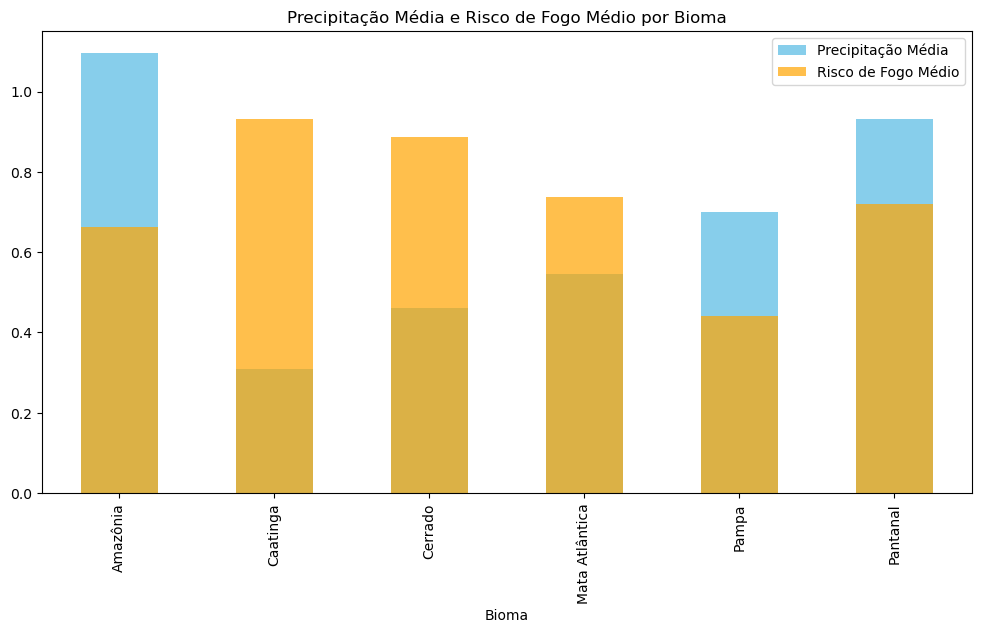

In [14]:
# Precipitação média por bioma
biome_precipitation = base_dados.groupby('Bioma')['Precipitacao'].mean()
biome_fire_risk = base_dados.groupby('Bioma')['RiscoFogo'].mean()

plt.figure(figsize=(12, 6))
biome_precipitation.plot(kind='bar', label='Precipitação Média', color='skyblue')
biome_fire_risk.plot(kind='bar', label='Risco de Fogo Médio', color='orange', alpha=0.7)
plt.legend()
plt.title('Precipitação Média e Risco de Fogo Médio por Bioma')
plt.show()


In [6]:
# Definir a variável 'biomas' com os biomas únicos
biomas = base_dados['Bioma'].unique()

# Gráficos de Precipitação e Risco de Fogo por Bioma

# Função para plotar dados por partes
def plot_by_parts(df, group_col, value_col, title):
    unique_groups = df[group_col].unique()
    plt.figure(figsize=(12, 6))
    for group in unique_groups:
        chunk = df[df[group_col] == group].set_index('DataHora')[value_col]
        chunk.plot(label=group)
    plt.legend()
    plt.title(title)
    plt.show()

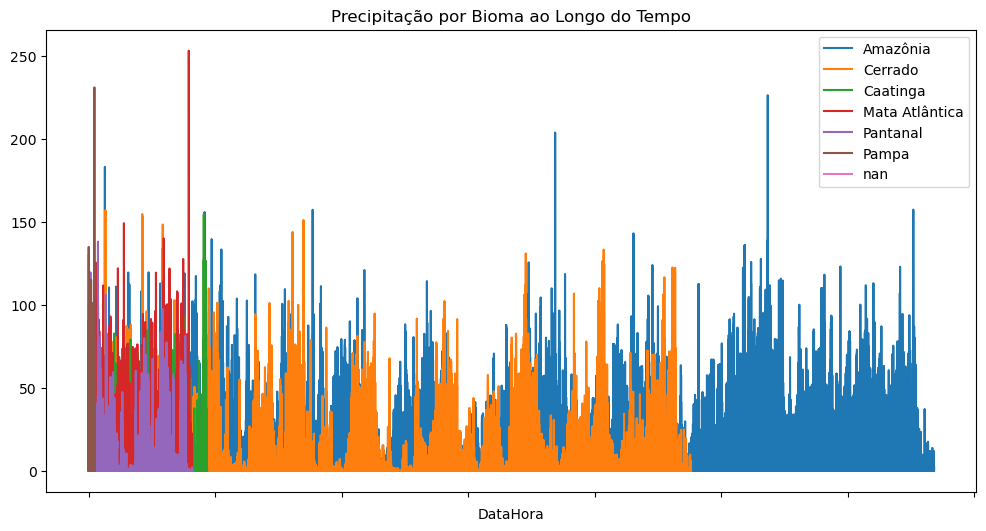

In [7]:
plot_by_parts(base_dados, 'Bioma', 'Precipitacao', 'Precipitação por Bioma ao Longo do Tempo')


c:\Users\gustavo.j.siebel\AppData\Local\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


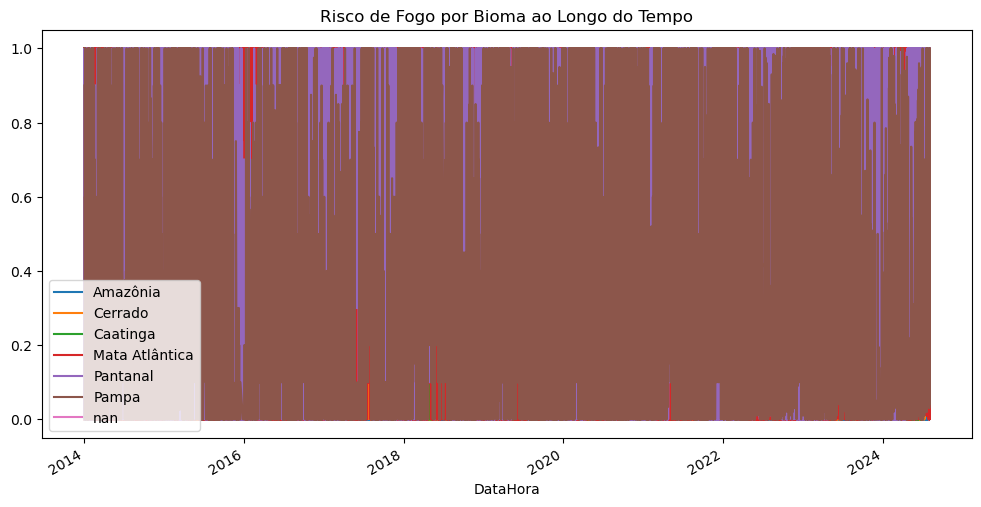

In [18]:
# Gráfico de Risco de Fogo por Bioma
plot_by_parts(base_dados, 'Bioma', 'RiscoFogo', 'Risco de Fogo por Bioma ao Longo do Tempo')

In [ ]:
# Gráficos de Precipitação e Risco de Fogo por Bioma
# Gráfico de Precipitação por Bioma
plt.figure(figsize=(12, 6))
for bioma in biomas:
    base_dados_bioma = base_dados[base_dados['Bioma'] == bioma]
    base_dados_bioma.set_index('DataHora')['Precipitacao'].plot(label=bioma)
plt.legend()
plt.title('Precipitação por Bioma ao Longo do Tempo')
plt.show()

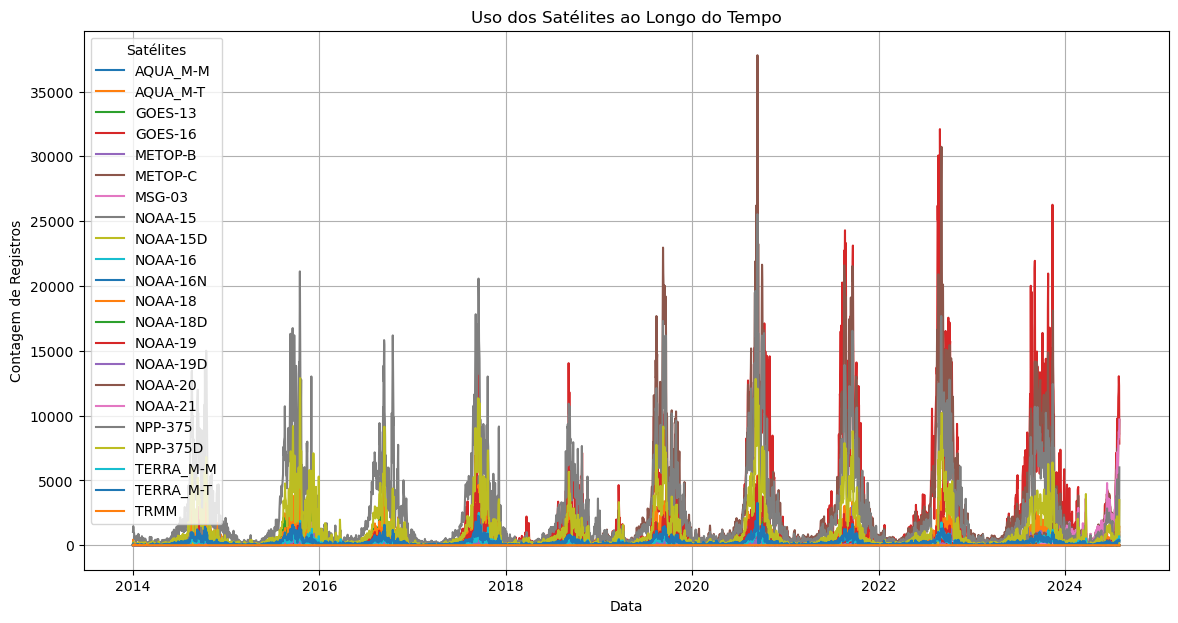

In [15]:
import matplotlib.pyplot as plt

# Agrupar os dados por Satelite e DataHora (somente data, sem a hora)
base_dados['Data'] = base_dados['DataHora'].dt.date
satellite_counts = base_dados.groupby(['Data', 'Satelite']).size().unstack(fill_value=0)

# Plotar o gráfico
plt.figure(figsize=(14, 7))
for satellite in satellite_counts.columns:
    plt.plot(satellite_counts.index, satellite_counts[satellite], label=satellite)

plt.xlabel('Data')
plt.ylabel('Contagem de Registros')
plt.title('Uso dos Satélites ao Longo do Tempo')
plt.legend(title='Satélites')
plt.grid(True)
plt.show()


### Filtrando apenas pelos dados do **AQUA_M-T**

C:\Users\gustavo.j.siebel\AppData\Local\Temp\ipykernel_472\3164614289.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aqua_data['Data'] = aqua_data['DataHora'].dt.date


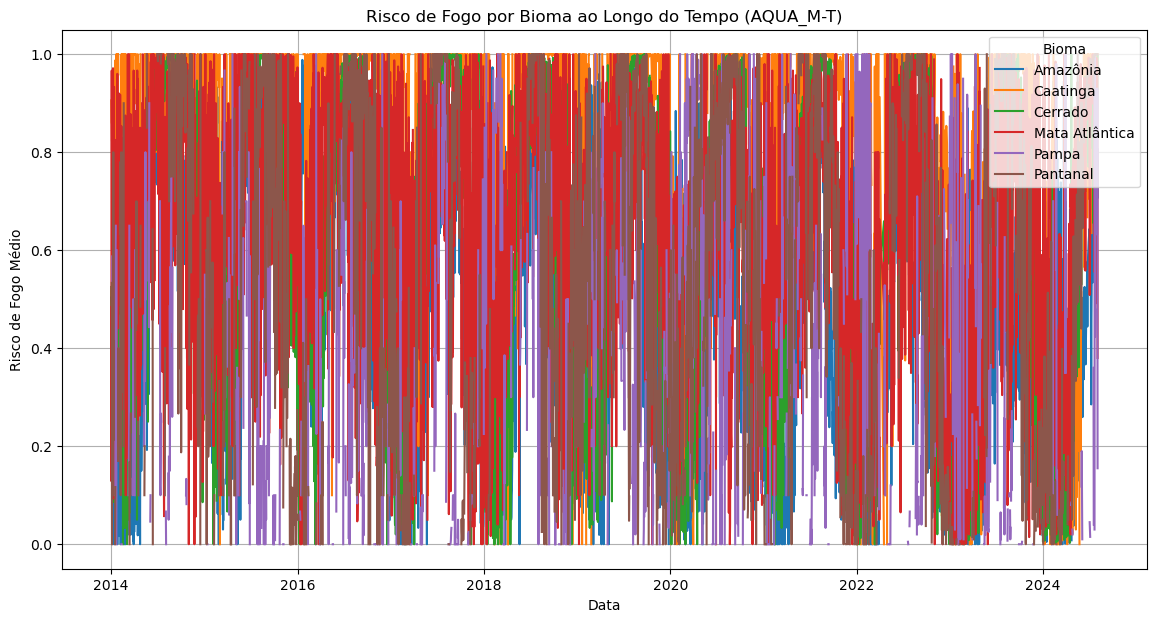

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Filtrar os dados para o satélite AQUA_M-T
aqua_data = base_dados[base_dados['Satelite'] == 'AQUA_M-T']

# Criar a coluna 'Data' extraindo a data de 'DataHora'
aqua_data['Data'] = aqua_data['DataHora'].dt.date

# Agrupar os dados por Data e Bioma, calculando a média de RiscoFogo
fire_risk_by_biome = aqua_data.groupby(['Data', 'Bioma'])['RiscoFogo'].mean().unstack()

# Plotar o gráfico
plt.figure(figsize=(14, 7))
for biome in fire_risk_by_biome.columns:
    plt.plot(fire_risk_by_biome.index, fire_risk_by_biome[biome], label=biome)

plt.xlabel('Data')
plt.ylabel('Risco de Fogo Médio')
plt.title('Risco de Fogo por Bioma ao Longo do Tempo (AQUA_M-T)')
plt.legend(title='Bioma', loc='upper right')
plt.grid(True)
plt.show()


In [17]:

# Filtrar os dados para o satélite AQUA_M-T
aqua_data = base_dados[base_dados['Satelite'] == 'AQUA_M-T']

# Salvar os dados filtrados em um arquivo CSV
aqua_data.to_csv('dados_limpos_v3_aqua_mt.csv', index=False)


### Ajuste **DiaSemChuva** 

#### Interpolate

In [43]:
import pandas as pd

base_dados = pd.read_csv('dados_limpos_v3_aqua_mt.csv')

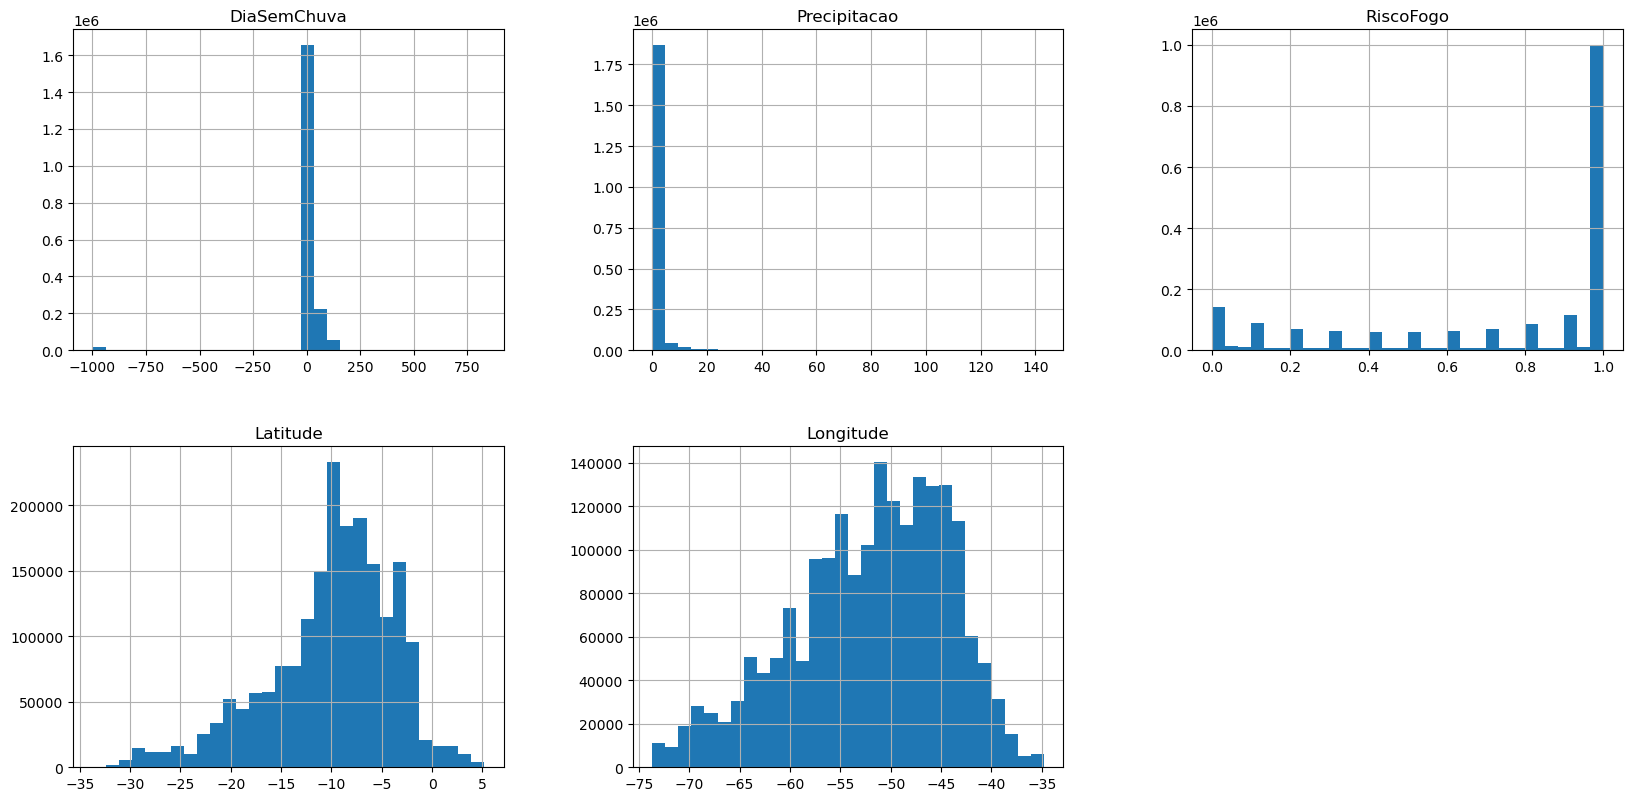

In [44]:
#Distribuição das Variáveis numéricas ANTES
base_dados.hist(bins=30, figsize=(20, 15), layout=(3, 3))
plt.show()

In [48]:
# Verifica se tem algum valor entre 0 e -999
valores_incorretos = base_dados[(base_dados['DiaSemChuva'] >= -998) & (base_dados['DiaSemChuva'] < 0)]
valores_incorretos

,DataHora,Satelite,Pais,Estado,Municipio,Bioma,DiaSemChuva,Precipitacao,RiscoFogo,Latitude,Longitude,Data


In [49]:
#Ajuste na base de dados Risco Fogo para substituir os valores NaN ou -9999 pela média dos vizinhos mais proximos 
base_dados['DiaSemChuva'] = base_dados['DiaSemChuva'].apply(lambda x: np.nan if x < 0 else x)

base_dados['DiaSemChuva'] = base_dados['DiaSemChuva'].interpolate()

In [50]:
#DataHora pra tipo de dado Date
base_dados['DataHora'] = pd.to_datetime(base_dados['DataHora'])

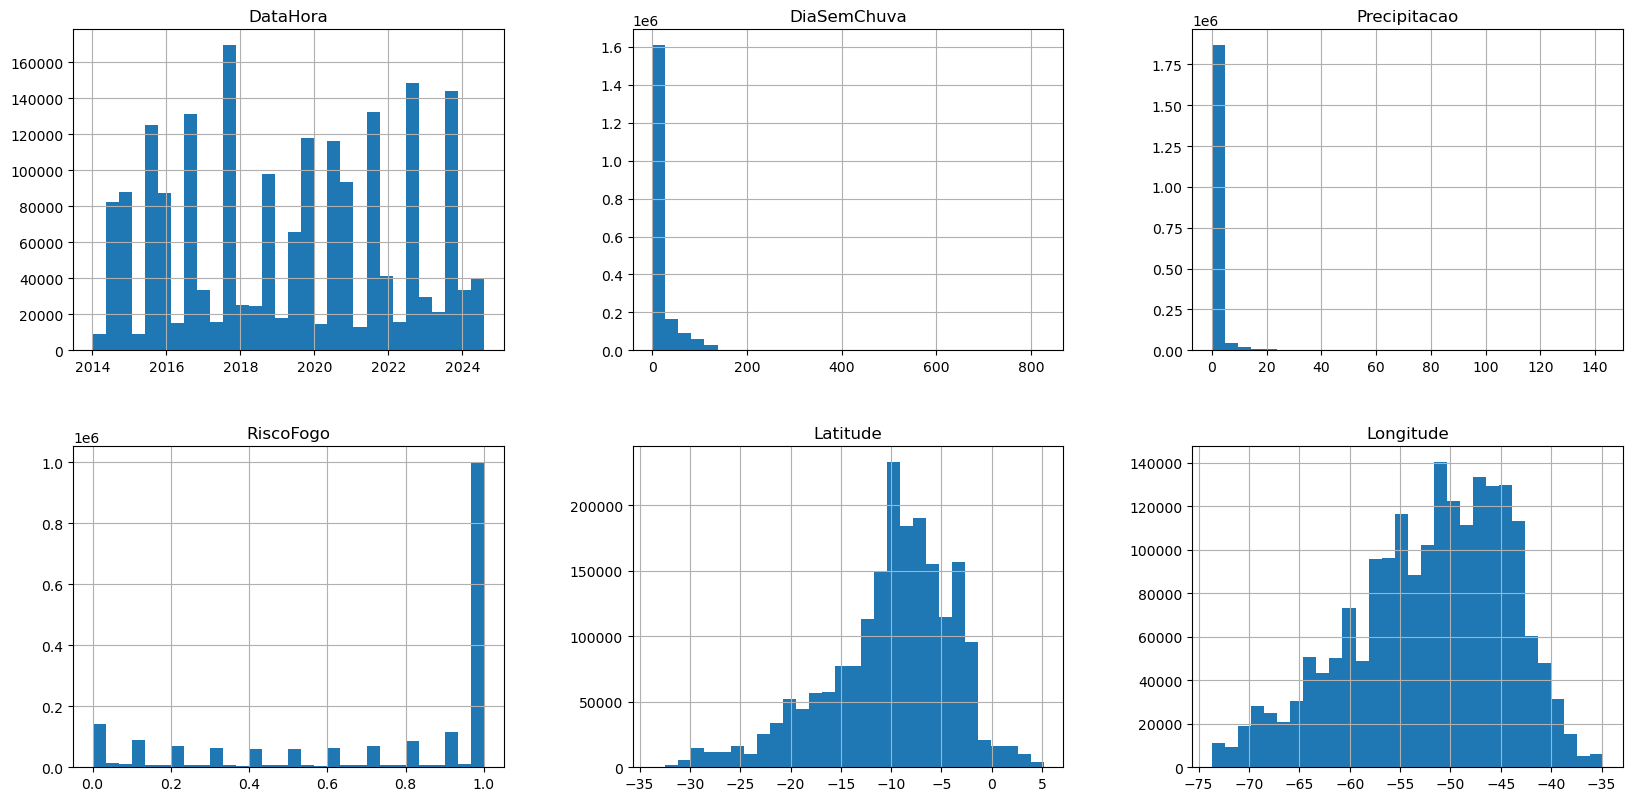

In [51]:
#Distribuição das Variáveis numéricas DEPOIS
base_dados.hist(bins=30, figsize=(20, 15), layout=(3, 3))
plt.show()

In [52]:
base_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1956210 entries, 0 to 1956209
Data columns (total 12 columns):
 #   Column        Dtype         
---  ------        -----         
 0   DataHora      datetime64[ns]
 1   Satelite      object        
 2   Pais          object        
 3   Estado        object        
 4   Municipio     object        
 5   Bioma         object        
 6   DiaSemChuva   float64       
 7   Precipitacao  float64       
 8   RiscoFogo     float64       
 9   Latitude      float64       
 10  Longitude     float64       
 11  Data          object        
dtypes: datetime64[ns](1), float64(5), object(6)
memory usage: 179.1+ MB


In [53]:
base_dados.to_csv('dados_limpos_v4.csv')

## Análise dos Dados Limpos e Filtrados 

Os tratamento da base de dados se deu com as segintes etapas: 

1. Remover valores duplicados 
2. Ajuste dos outliers RiscoFogo c/ Interpolate
3. Remoçao da coluna FRP 
4. Filtro da base apenas pelo satélite AQUA_M-T

**Validação final dos dados**

In [54]:
import pandas as pd 
import matplotlib.pyplot  as plt

In [55]:
base_dados = pd.read_csv('dados_limpos_v4.csv')

In [56]:
base_dados['DataHora'] = pd.to_datetime(base_dados['DataHora'])

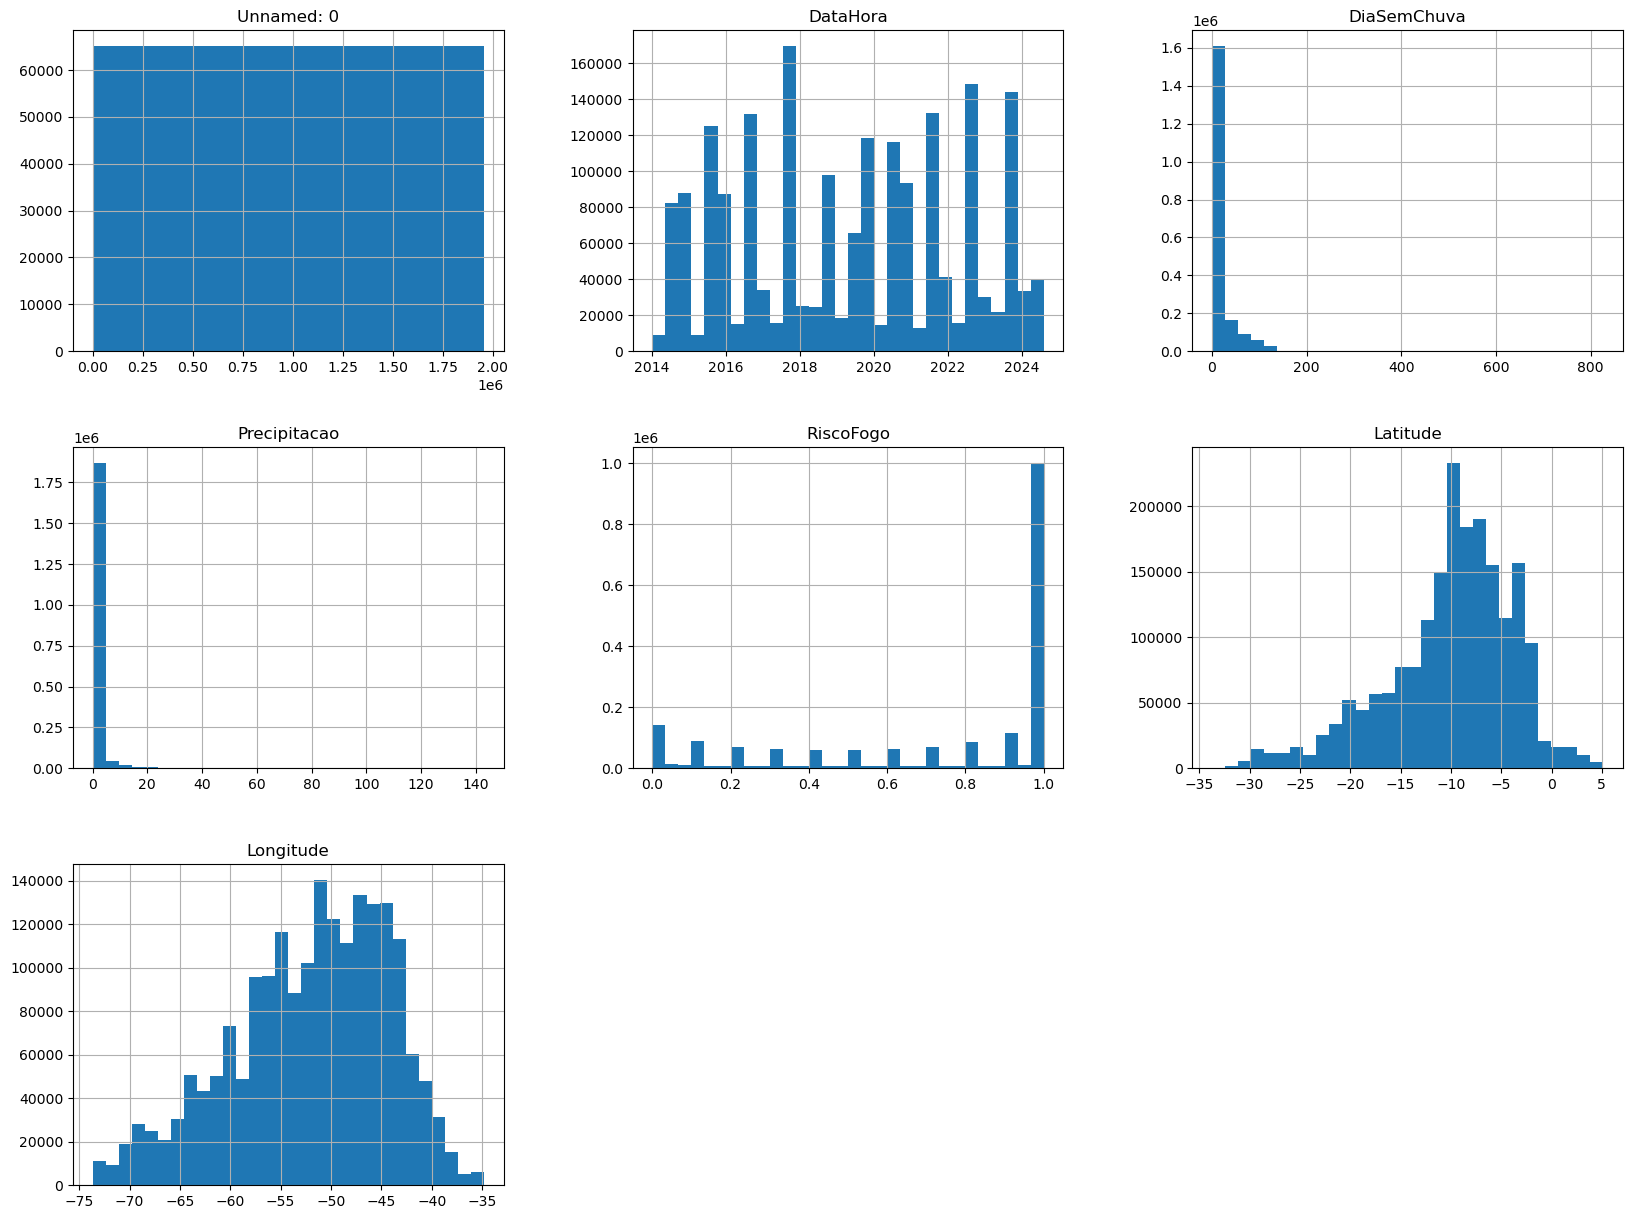

In [57]:
# Histograma para variáveis numéricas - Distribuição das Variáveis numéricas
base_dados.hist(bins=30, figsize=(20, 15), layout=(3, 3))
plt.show()

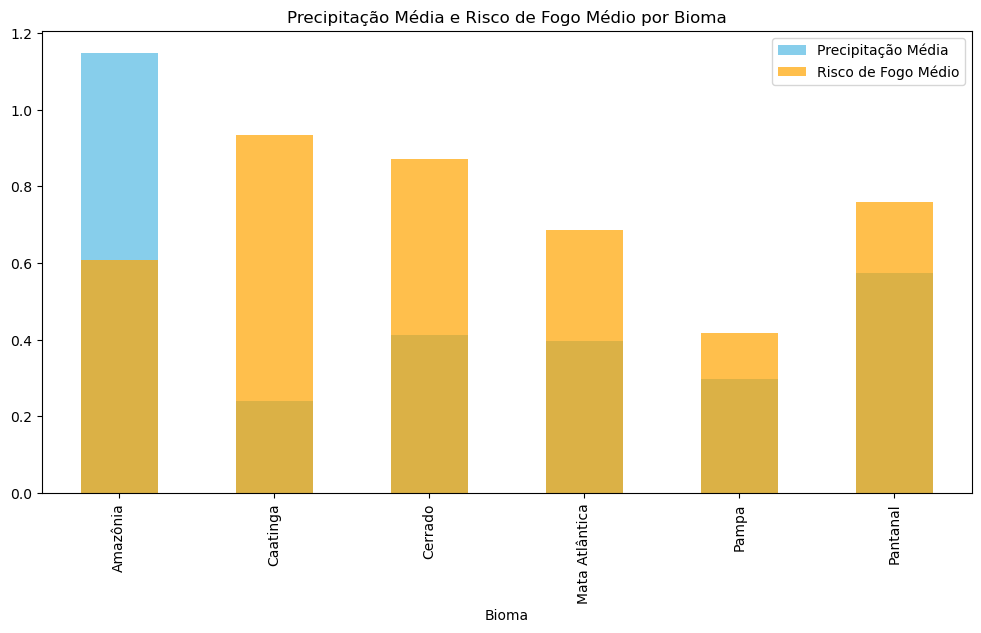

In [58]:
# Precipitação média por bioma
biome_precipitation = base_dados.groupby('Bioma')['Precipitacao'].mean()
biome_fire_risk = base_dados.groupby('Bioma')['RiscoFogo'].mean()

plt.figure(figsize=(12, 6))
biome_precipitation.plot(kind='bar', label='Precipitação Média', color='skyblue')
biome_fire_risk.plot(kind='bar', label='Risco de Fogo Médio', color='orange', alpha=0.7)
plt.legend()
plt.title('Precipitação Média e Risco de Fogo Médio por Bioma')
plt.show()


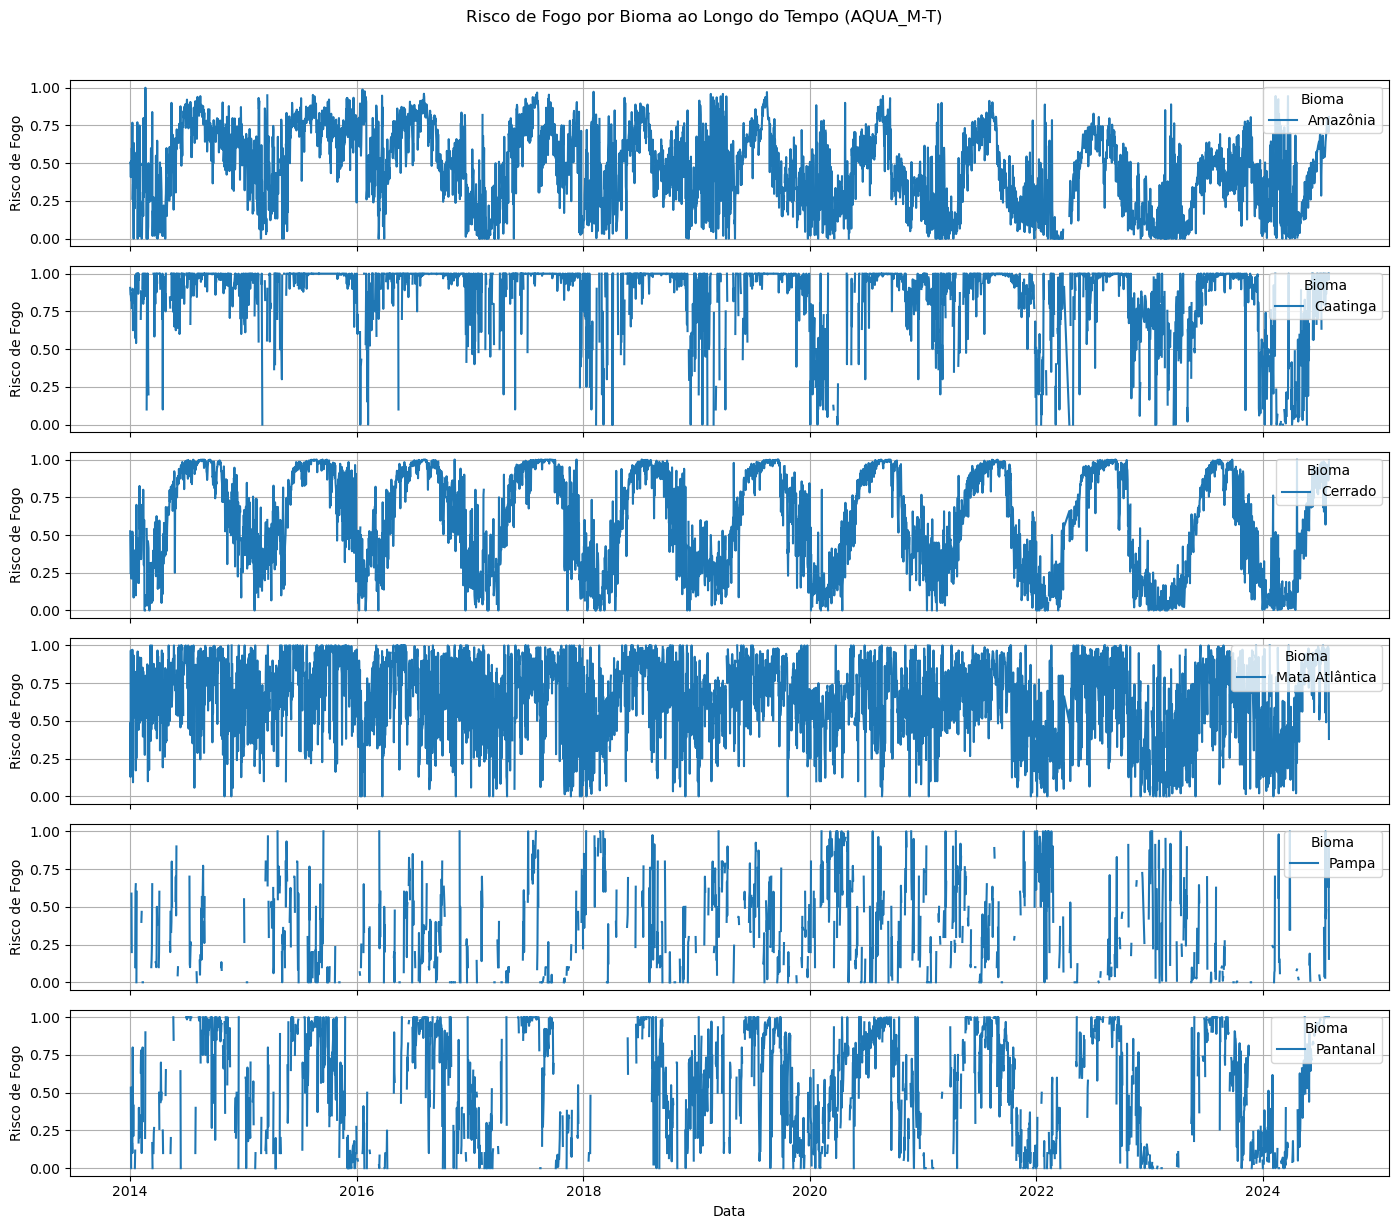

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

# Filtrar os dados para o satélite AQUA_M-T
aqua_data = base_dados[base_dados['Satelite'] == 'AQUA_M-T']

# Criar a coluna 'Data' extraindo a data de 'DataHora'
aqua_data['Data'] = aqua_data['DataHora'].dt.date

# Agrupar os dados por Data e Bioma, calculando a média de RiscoFogo
fire_risk_by_biome = aqua_data.groupby(['Data', 'Bioma'])['RiscoFogo'].mean().unstack()

# Criar subplots
num_biomes = len(fire_risk_by_biome.columns)
fig, axes = plt.subplots(num_biomes, 1, figsize=(14, 2*num_biomes), sharex=True)

# Plotar cada bioma em uma raia (linha) separada
for i, biome in enumerate(fire_risk_by_biome.columns):
    axes[i].plot(fire_risk_by_biome.index, fire_risk_by_biome[biome], label=biome)
    axes[i].set_ylabel('Risco de Fogo')
    axes[i].legend(title='Bioma', loc='upper right')
    axes[i].grid(True)

# Configurar o eixo x e o título geral do gráfico
axes[-1].set_xlabel('Data')
fig.suptitle('Risco de Fogo por Bioma ao Longo do Tempo (AQUA_M-T)', y=1.02)
plt.tight_layout()
plt.show()
